# Proyek 1 Machine Learning Terapan

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Menampilkan Sampel dari Dataset

In [3]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Menampilkan Info dari Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Menampilkan jumlah missing value pada atribut

In [5]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


### Menampilkan deskripsi statistik pada dataset

In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Menampilkan boxplot pada setiap fitur

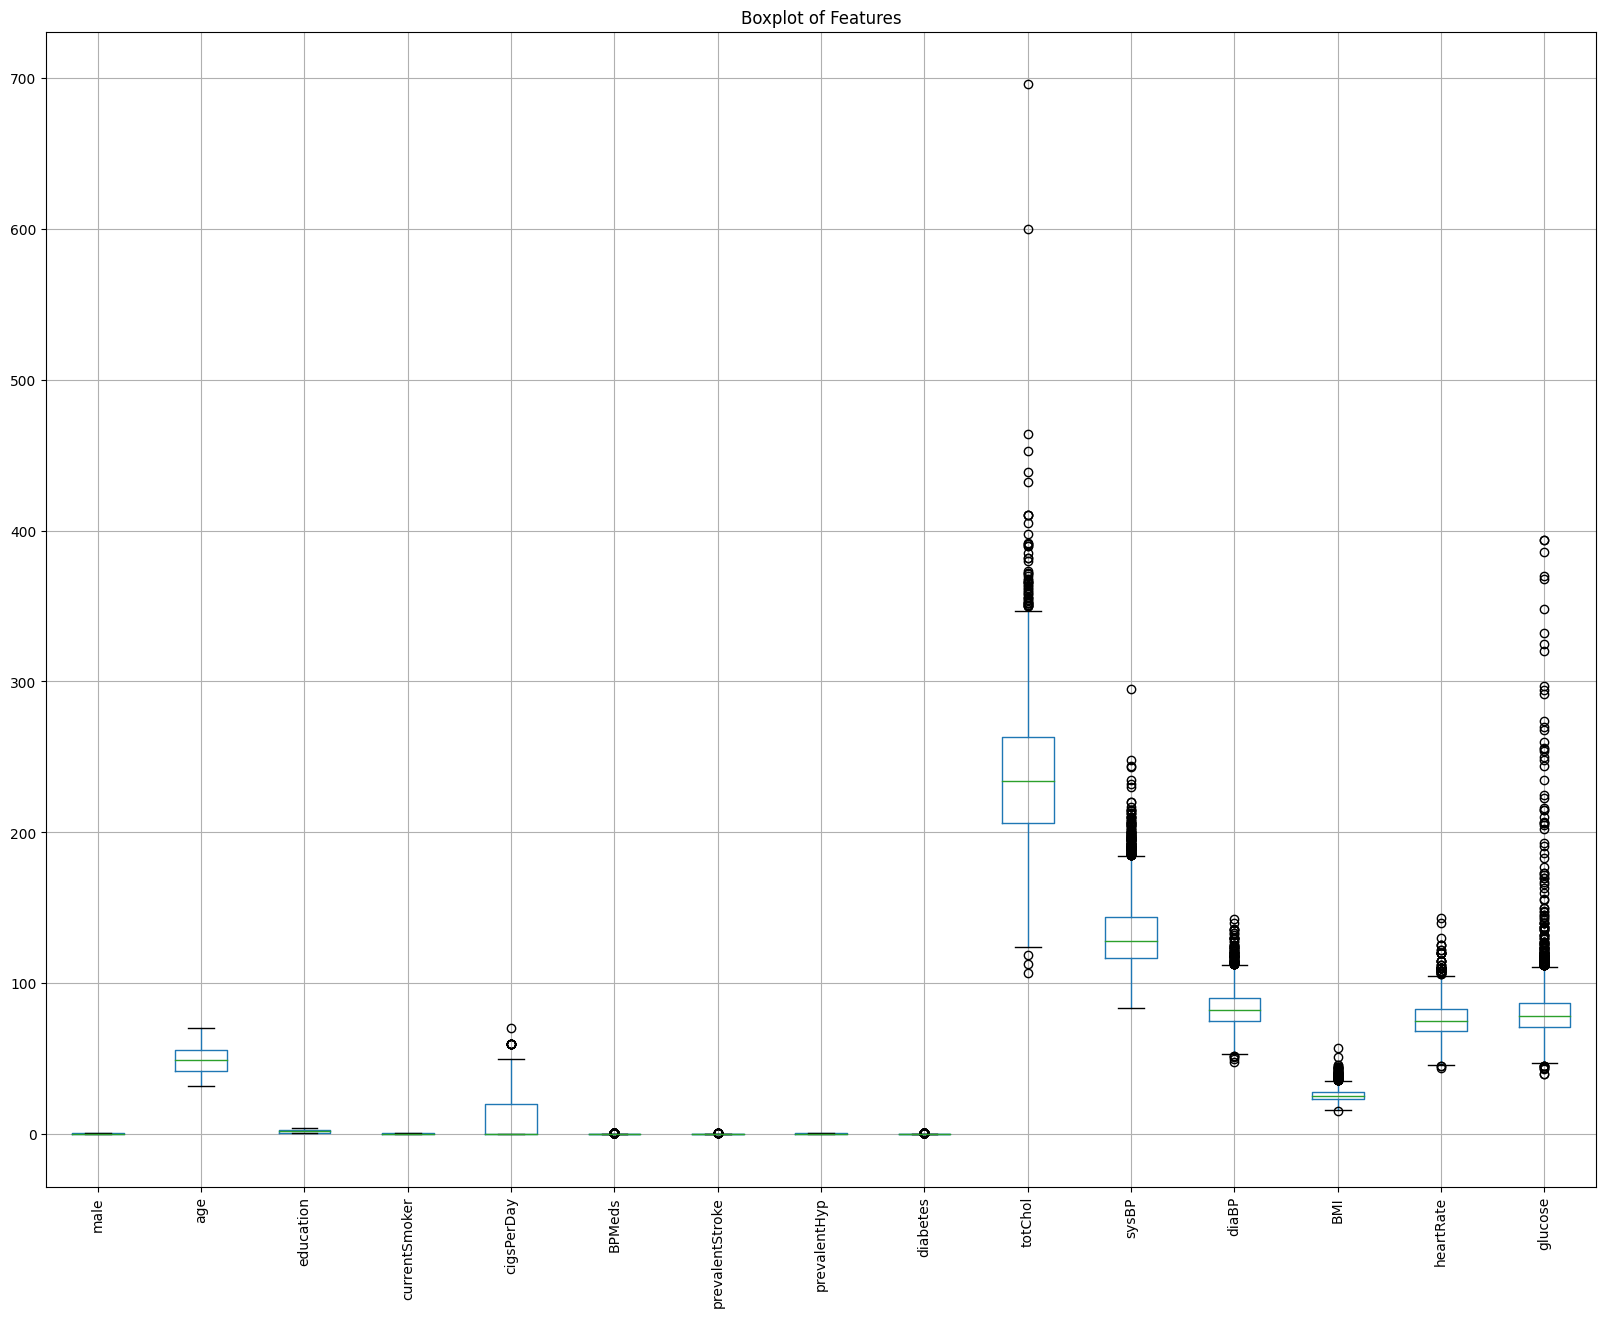

In [9]:
# Visualisasi boxplot terhadap setiap fitur (kecuali TenYearCHD)
plt.figure(figsize=(20, 15))
df.drop(columns='TenYearCHD').boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

### Jumlah Outliers di setiap fitur

In [10]:
# Menghitung jumlah outlier pada setiap fitur (kecuali TenYearCHD)
outliers = {}
for column in df.columns:
    if column != 'TenYearCHD':  # Mengabaikan fitur TenYearCHD
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Menampilkan jumlah outlier pada setiap fitur
print("Jumlah Outlier pada Setiap Fitur (kecuali TenYearCHD):")
for feature, num_outliers in outliers.items():
    print(f"{feature}: {num_outliers} outliers")

Jumlah Outlier pada Setiap Fitur (kecuali TenYearCHD):
male: 0 outliers
age: 0 outliers
education: 0 outliers
currentSmoker: 0 outliers
cigsPerDay: 12 outliers
BPMeds: 124 outliers
prevalentStroke: 25 outliers
prevalentHyp: 0 outliers
diabetes: 109 outliers
totChol: 56 outliers
sysBP: 126 outliers
diaBP: 81 outliers
BMI: 97 outliers
heartRate: 76 outliers
glucose: 188 outliers


### Menampilkan jumlah Target (TenYearCHD) pada setiap value

In [13]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,644


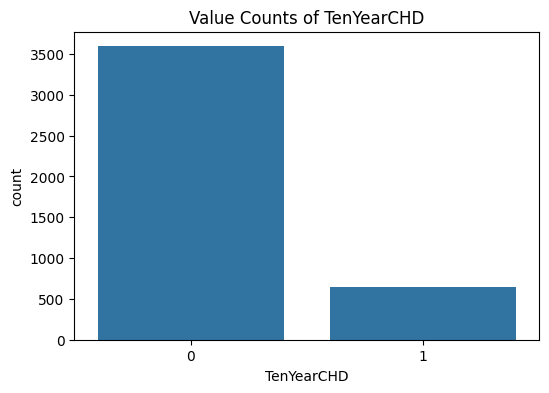

In [14]:
# Visualisasi value counts terhadap target (TenYearCHD)
plt.figure(figsize=(6, 4))
sns.countplot(x='TenYearCHD', data=df)
plt.title('Value Counts of TenYearCHD')
plt.show()

### Melakukan Analisis Korelasi pada Setiap Fitur

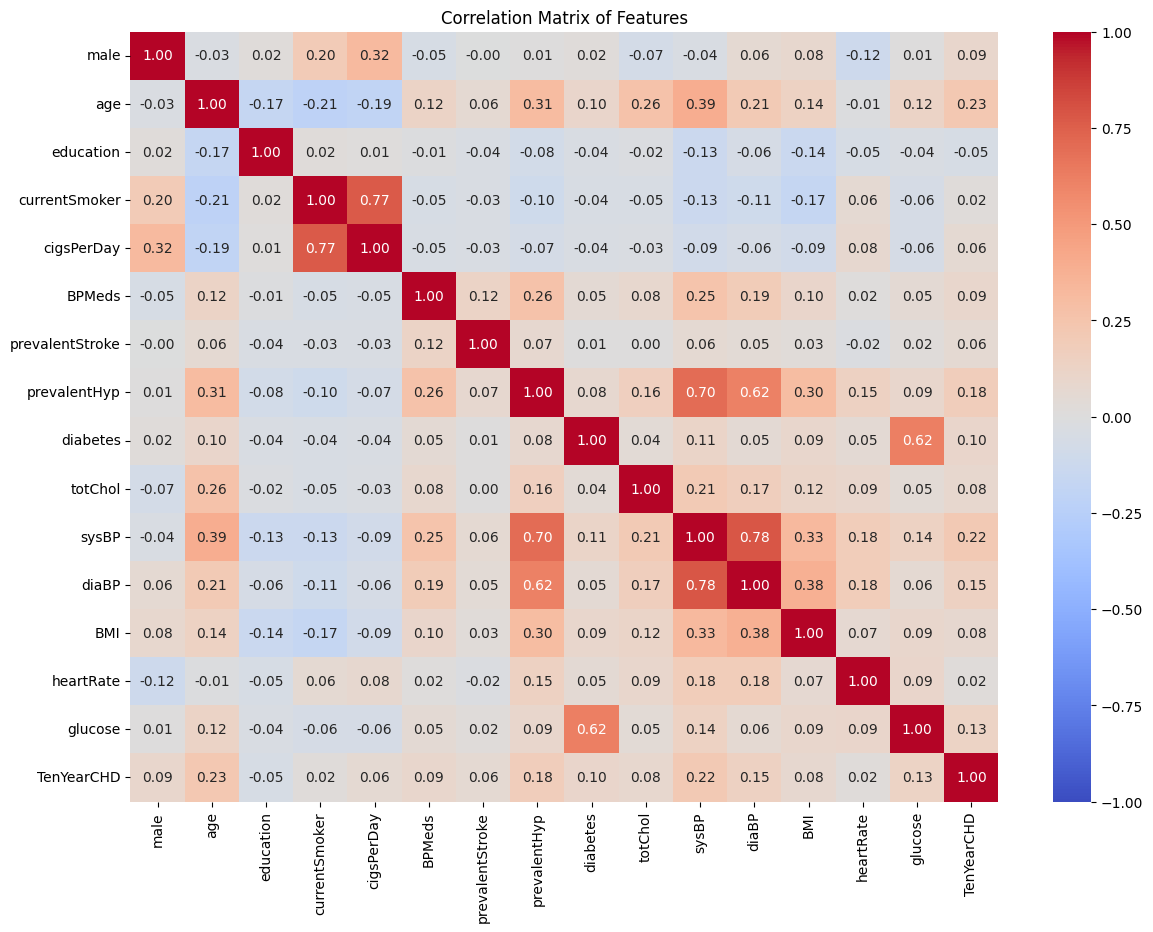

In [15]:
# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

## Data Preparation

### Penanganan Missing Value

In [16]:
# Penanganan Missing Value dengan Mengganti Median
df.fillna(df.median(), inplace=True)

In [18]:
# Verifikasi bahwa tidak ada lagi missing values
print("\nJumlah missing value setelah penggantian dengan median:")
df.isnull().sum()


Jumlah missing value setelah penggantian dengan median:


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Melakukan feature selection

In [20]:
#feature yang memiliki coeficient korelasi kurang dari 0.05
feature_drop = ['education', 'currentSmoker', 'heartRate']
#dim_reduction
df = df.drop(columns=feature_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   cigsPerDay       4238 non-null   float64
 3   BPMeds           4238 non-null   float64
 4   prevalentStroke  4238 non-null   int64  
 5   prevalentHyp     4238 non-null   int64  
 6   diabetes         4238 non-null   int64  
 7   totChol          4238 non-null   float64
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4238 non-null   float64
 11  glucose          4238 non-null   float64
 12  TenYearCHD       4238 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 430.5 KB


### Upsampling kelas minoritas

In [21]:
# Memisahkan kelas mayoritas dan minoritas
df_majority = df[df.TenYearCHD == 0]
df_minority = df[df.TenYearCHD == 1]

In [22]:
from sklearn.utils import resample

# Upsampling kelas minoritas
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample dengan replacement
                                 n_samples=len(df_majority),  # Sesuaikan jumlah mayoritas
                                 random_state=42)  # Untuk reproducibility

In [23]:
# Gabungkan kembali dataset mayoritas dan minoritas yang di-upsample
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [24]:
df_upsampled['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,3594


### Melakukan Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Train-test split
x = df_upsampled.drop(columns='TenYearCHD')
y = df_upsampled['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Melakukan Standarisasi

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Modelling

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

### Logistic Regression

In [29]:
lr_model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)

### K-Nearest Neighbor

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

## Evaluation

### Hasil Evaluasi Random Forest

In [31]:
from sklearn.metrics import classification_report

# Classification Reports
rf_classification_report = classification_report(y_test, rf_predictions)
lr_classification_report = classification_report(y_test, lr_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       753
           1       0.80      0.91      0.85       685

    accuracy                           0.85      1438
   macro avg       0.86      0.85      0.85      1438
weighted avg       0.86      0.85      0.85      1438



### Hasil Evaluasi Logistic Regression

In [32]:
print("Logistic Regression Classification Report:\n", lr_classification_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       753
           1       0.64      0.68      0.66       685

    accuracy                           0.66      1438
   macro avg       0.66      0.66      0.66      1438
weighted avg       0.67      0.66      0.66      1438



### Hasil Evaluasi K-Nearest Neighbor

In [33]:
print("K-Nearest Neighbor Classification Report:\n", knn_classification_report)

K-Nearest Neighbor Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       753
           1       0.71      0.91      0.80       685

    accuracy                           0.78      1438
   macro avg       0.80      0.78      0.78      1438
weighted avg       0.80      0.78      0.78      1438

